# Basics of Machine Learning

In [11]:
# import necessary libraries

import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Exercise 1: 
- def function `f` which takes in a single argument `x` and returns the value of $$4*x^2 - 5*x + 8$$
- plot the function `f` for $x$ in the range $[-5, 5]$ in steps of 0.25

In [12]:
# Exercise 1 part 1
def f(x):
  return 4*x**2 - 5*x + 8

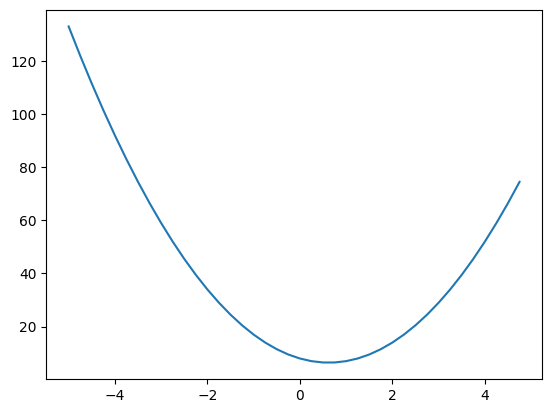

In [13]:
# Exercise 1 part 2
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

Derivative of this equation?: $$8*x - 5$$

Exercise 2: Calculate the value of the derivative at $x = 2$ using first order approximation: $$f'(x) = \frac{f(x + h) - f(x)}{h}$$

In [14]:
# Exercise 2
h = 0.0001
def derivative(f, x):
  return (f(x + h) - f(x - h)) / (2 * h)

derivative(f, 2)

11.00000000000989

What about the derivative of a,b,c for the equation below?
$$d = a*b + c$$

where:

$a = 2.0$

$b = -3.0$

$c = 10.0$

In [15]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
d

4.0

In [16]:
a = 2.0
b = -3.0
c = 10.0

h = 0.0001

c += h
d1 = a * b + c
slope = (d1 - d) / h
slope

0.9999999999976694

Partial Derivatives: treat all other variables as constants and differentiate with respect to the variable of interest.

In [17]:
class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0
    self._prev = set(_children)
    self._op = _op
    self.label = label
  
  def __repr__(self):
    return f"Value({self.data})"
  
  def __add__(self, other):
    return Value(self.data + other.data, (self, other), '+')
  
  def __mul__(self, other):
    return Value(self.data * other.data, (self, other), '*')

In [18]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label='e'
d = e + c; d.label='d'

d = a*b + c # (a.__mul__(b)).__add__(c)

In [19]:
d

Value(4.0)

Install graphviz

1. download from here: https://www.graphviz.org/download/
2. download on python: `!pip install graphviz`

In [20]:
## Graphviz code

from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) #left right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular {'record'} node for it
        dot.node(uid, label="{ %s | data %.4f }" % (n.label, n.data, ), shape='record')
        if n._op:
            # if this value is the result of an operation, create a node for the operation
            dot.node(name=uid + n._op, label=n._op)
            # and an edge from the op node to the value node
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

In [21]:
draw_dot(d)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [22]:
f = Value(-2.0, label='f')
L = d * f; L.label='L'
L

Value(-8.0)